# Hoeffding Inequality

Run a computer simulation for flipping 1,000 virtual fair coins. Flip each coin independently 10 times.

Note: this is a first naive implementation, below is a much faster one using binomial distribution...

In [6]:
import random
import numpy as np

In [73]:
def run_experiment():
    coins_flips = []

    # 0 is tail
    # 1 is head
    
    # For 1000 coins
    for _ in range(1000):
        coin_flips = []
        
        # Flip the coin 10 times
        for _ in range(10):
            coin_flips.append(random.choice([0,1]))
        
        coins_flips.append(coin_flips)

    # c1 is the first coin flipped
    c_1 = coins_flips[0]
    ν1 = sum(c_1)/10

    # crand is a coin chosen randomly from the 1,000
    c_rand = random.choice(coins_flips)
    νrand = sum(c_rand)/10

    # cmin is the coin which had the minimum frequency of heads
    coins_heads_frequency = list(map(lambda x: sum(x), coins_flips))
    min_heads_frequency = min(coins_heads_frequency)
    a = np.array(coins_heads_frequency)
    index = np.where(a == min_heads_frequency)[0][0]
    c_min = coins_flips[index]
    νmin = sum(c_min)/10
    
    return (ν1, νrand, νmin)

In [85]:
experiments = []

# Run the experiment 100,000 times in order to get a full distribution of ν1, νrand, and νmin
NUMBER_OF_RUNS = 100000

for _ in range(NUMBER_OF_RUNS):
    experiments.append(run_experiment())

0.00503


## Question 1

In [126]:
avg_νmin = sum(list(map(lambda x: x[2], experiments)))/NUMBER_OF_RUNS
print(f'Average νmin is {avg_νmin}, therefore closest to answer B (0.01)')

Average νmin is 0.03812299999997629, therefore closest to answer B (0.01)


## 1.1-bis Hoeffding Inequality with binomial distribution

In [25]:
import scipy.special

N = 100000
v_first = np.zeros(N)
v_min = np.zeros(N)
v_rand = np.zeros(N)

#Loop starts
for i in range(N):
    n,p = 10, 0.5
    flips = np.random.binomial(n, p, 1000)

    # Indices
    first_coin = 0
    min_coin = np.argmin(flips)
    rand_coin = np.random.randint(0,1000)

    v_first[i] = flips[first_coin]/n
    v_min[i] = flips[min_coin]/n
    v_rand[i] = flips[rand_coin]/n

#Loop ends

print(f'Average νmin is {np.average(v_min)}, therefore closest to answer D (0.5)')



Average νmin is 0.037795, therefore closest to answer D (0.5)


In [123]:
n,p = 10, 0.5
flips = np.random.binomial(n, p, 10)
print(flips)

[8 8 5 6 5 5 5 3 5 7]


### 2. Which coin(s) has a distribution of ν that satisfies the (single-bin) Hoeffding Inequality?

> The main point is that once you consider the sample, the probability becomes conditional on how this sample came out, and that could violate the 2e^{-2\epsilon^2N} bound, whereas the probability before a sample was drawn always obeys the bound.

# Linear Regression

In [20]:
import import_ipynb
from hw1 import is_misclassified_point, create_dataset, create_experiment
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

### Illustration of Linear Regression

In [33]:
f, dataset = create_experiment(100)

In [34]:
# We can find w either using the Pseudo-Inverse
def pseudo_inverse(dataset):
    X = np.array(list(map(lambda x: [1] + x[0], dataset)))

    y = np.array(list(map(lambda x: x[1], dataset)))

    # Using pseudo-inverse
    pseudo_inverse = np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose())

    w = np.dot(pseudo_inverse, y)
    
    return w

w = pseudo_inverse(dataset)
print(w)

[-0.28442697 -1.26037714  0.40749928]


In [35]:
# Or we can use Scikit Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(list(map(lambda x: [1] + x[0], dataset)))

y = np.array(list(map(lambda x: x[1], dataset)))

reg = LinearRegression().fit(X, y)

sci_w = reg.coef_
sci_w[0] = reg.intercept_
print(sci_w)

reg.score(X,y)


[-0.28442697 -1.26037714  0.40749928]


0.5759097707025602

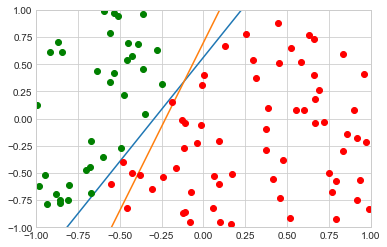

In [36]:
plt.axis([-1, 1, -1, 1])

x = np.linspace(-1, 1, 2)
plt.plot(x, f(x))

def g(x):
    y = -(w[1]*x+w[0])/w[2]
    return y

plt.plot(x, g(x))

for data in dataset:
    point = data[0]
    output = data[1]
    plt.plot(point[0], point[1],  'go' if output > 0 else 'ro')

### Question 5

In [43]:
experiments = []

N = 100

#  Repeat the experiment 1000 times and take the average
for _ in range(1000):
    f, dataset = create_experiment(N)
    
    # Use Linear Regression to find g
    w = pseudo_inverse(dataset)
    
    # evaluate Ein, the fraction of in-sample points which got classified incorrectly
    misclassified_points = list(filter(lambda data: is_misclassified_point(w, data), dataset))
    Ein = len(misclassified_points)/N
    
    experiments.append([w, Ein, f, dataset])

In [44]:
avg_Ein = np.average(list(map(lambda x: x[1], experiments)))
print(f'Average Ein is {avg_Ein}, there closed to 0.01: Answer C')

Average Ein is 0.03314, there closed to 0.01: Answer C


### Question 6

In [45]:
Eouts = []

#  Repeat the experiment 1000 times and take the average
for i in range(1000):
    # Take the g from Problem 5
    experiment = experiments[i]
    w = experiment[0]
    
    f = experiment[2]
    
    # generate 1000 fresh points and use them to estimate the out-of-sample error Eout of g that you got in Problem 5
    SEPARATED_DATASET_SIZE = 1000
    separated_dataset = create_dataset(f, SEPARATED_DATASET_SIZE)
    
    misclassified_points = list(filter(lambda x: is_misclassified_point(w, x), separated_dataset))

    error_rate = len(misclassified_points)/SEPARATED_DATASET_SIZE
    
    Eouts.append(error_rate)

In [47]:
avg_Eout = np.average(Eouts)
print(f'Average Eout is {avg_Eout}, there closest to 0.01: Answer C')

Average Eout is 0.04286800000000001, there closest to 0.01: Answer C
